# Preprocessing der Texte 

Autorin: Maria Hartmann

In [1]:
# Imports
import os
import numpy as np
import re # module for regular expression operations
import csv # module for csv output
from sklearn.model_selection import train_test_split # module to split data into train and test sets
import matplotlib.pyplot as plt # module for visualization
from wordcloud import WordCloud # module for wordclouds

In [2]:
# Class for accessing and preprocessing the data
folder = '../Preprocessing'
datasets = '../Datasets'
file = folder+'/de_labeled_corpus.csv' # Hypotheses-Blogposts: filename;classes;text

if not os.path.exists(datasets):
    os.makedirs(datasets)

class MyCorpus(object):
    
    """ Preprocessing des Korpus """

    # file: input data
    # def __init__(self, file, x, y):
    def __init__(self, file):
        self.file = file
    
    
    # memory friendlys because doesn't load the corpus into memory!
    def __iter__(self):
        openfile = open(self.file, 'r', encoding='utf-8')
        
        # save each document as one item of a list (one document = identnumber, nace-code-list + text)
        documents = openfile.readlines()
        openfile.close()
        texts = self.split_csv(documents)
        for text in texts:
            #print("\n text in iter:", text)
            yield text
        
            
            
    # preprocessing
    #==========================
    
    # convert text to lower-case, remove punctuation and stopwords
    def normalize_text(self, text):
        
        """Bereinigt den Text:
        - transformiert alles in Kleinschrift 
        - löscht Satz- und Sonderzeichen"""
        
        norm_text = text.lower()
    
        # remove punctuation 
        for char in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                     '.', ',', ';', ':', '!', '?', '…','·', '·',
                     '"', '„', '“', '”', "´", "`", "’", "‘", "‚","'",
                     '(', ')', '[', ']', '{', '}', 
                     '/', '\\', '|', '_', '-', '–', '—',
                     '­', '', '', '■', '•', 
                     '§', '$', '@', '€', '&', '%', '&', '+', '*', '=', '#',  
                     '«', '»', '≥', '<', '>', '^']:
            norm_text = norm_text.replace(char, ' ')
        tokens = norm_text.split()
        
        vocab = {}
        for word in tokens:
            if word in vocab:
                vocab[word] += 1
            else:
                vocab[word] = 1

        
        """ # read stopwords
        words = []
        stopwords = open(folder+'/german_stopwords_plain.txt', 'r').read()
        
        for token in tokens:
            #if token in stopWords:
            if token in stopwords:
                continue
            else:
                words.append(token)"""
        
        #return words, vocab
        #return norm_text, vocab
        return tokens, vocab
        
    # split identnumber, nace-code-list and corporate purpose and save in lists
    def split_csv(self, documents):   
        
        """Splittet jede Zeile des eingelesenen Dokuments in die drei Listen
        1) filnames
        2) labels
        3) text """
        
        
        ident = []
        label = []
        text = []
        vocabulary = {}

        # first row is headline
        for i, document in enumerate(documents[1:]):
            tmp_ident = document.split(";", 1)[0]
            #print("tmp_ident:", tmp_ident)
            tmp_label = []
            if re.match("aes_", tmp_ident): # Blog "aes - Archiv der Erzdiözese Salzburg" hat nur Thèmes: Histoire, Religions
                tmp_label3 = document.split(";", 2)[1].strip()
                tmp_label3 = tmp_label3.lower().replace('"', '').strip().split(",")
                tmp_label3 = [x.strip()+'_t' for x in tmp_label3]
                tmp_label.extend(tmp_label3)
                #print("Sonderfall:", tmp_ident, tmp_label)
                tmp_text, vocab = self.normalize_text(document.split(";", 3)[2])
                #tmp_text = document.split(";", 3)[2]
                #print("tmp_text:", tmp_text)
            else:
                tmp_label1 = document.split(";", 2)[1].strip()
                #print("tmp_label1:", tmp_label1)
                tmp_label2 = document.split(";", 3)[2].strip()
                #print("tmp_label2:", tmp_label2)
                tmp_text, vocab = self.normalize_text(document.split(";", 4)[3])
                #tmp_text = document.split(";", 4)[3].strip()
                #print("tmp_text:", tmp_text)

                tmp_label1 = tmp_label1.lower().replace('"', '').strip().split(",")
                tmp_label1 = [x.strip()+'_d' for x in tmp_label1]
                tmp_label.extend(tmp_label1)
                    
                tmp_label2 = tmp_label2.lower().replace('"', '').strip().split(",")
                tmp_label2 = [x.strip()+'_t' for x in tmp_label2]
                tmp_label.extend(tmp_label2)
                #tmp_label = (tmp_label1 + tmp_label2)
                #print(tmp_label)

            tmp_label = [x.strip() for x in tmp_label]
            ident.append(tmp_ident)
            label.append(tmp_label) 
            text.append(tmp_text)
    
            for key, value in vocab.items():
                if key in vocabulary:
                    vocabulary[key] += value
                else:
                    vocabulary[key] = value
                
        return ident, label, text, vocabulary
    
    
    

In [3]:
# get corpus from disk
identset, labelset, textset, vocab = MyCorpus(file)

# save vocabulary to file
with open(folder+'/blogs_vocabulary.txt',"w", encoding="utf8") as v:
    for key, value in sorted(vocab.items()):
        v.write("%s : %s\n" % (key, value))


In [4]:
print(identset[1000])
print(labelset[1000])
print(textset[1000])
print(len(identset))
print(len(labelset))
print(len(textset))

archivalia_10468.txt
['histoire et archéologie_d', 'sciences sociales interdisciplinaires_d', 'histoire_t', 'approches de corpus_t', 'enquêtes_t', 'archives_t']
['der', 'artikel', 'auf', 'http', 'redaktionsblog', 'hypotheses', 'org', 'steht', 'unter', 'http', 'creativecommons', 'org', 'licenses', 'by', 'er', 'darf', 'nachgenutzt', 'werden', 'wenn', 'die', 'namen', 'der', 'urheber', 'und', 'die', 'lizenz', 'genannt', 'werden', 'zitierempfehlung', 'klaus', 'graf', 'mareike', 'könig', 'entwicklungsfähige', 'blogosphäre', 'ein', 'blick', 'auf', 'deutschsprachige', 'geschichtsblogs', 'in', 'redaktionsblog', 'http', 'de', 'hyptheses', 'org', 'vom', 'dezember', 'online', 'http', 'redaktionsblog', 'hypotheses', 'org', 'ergänzen', 'sie', 'falls', 'sie', 'möchten', 'noch', 'das', 'datum', 'der', 'einsichtnahme', 'abgerufen', 'am', 'o', 'ä', 'von', 'klaus', 'graf', 'und', 'mareike', 'könig', 'nachdem', 'vor', 'kurzem', 'bei', 'archivalia', 'die', 'französische', 'blogosphäre', 'im', 'bereich', 'd

In [5]:
def get_label_dic(y):
    
    """Erstellt ein dictionary zur Anzahl der Blogbeiträge pro Label
    (Label : Anzahl der zugehörigen Blogbeiträge)"""
    
    labelcount_dic = {}
    #tmp_label = ", "
    for label in y:
        for l in label:
            if l in labelcount_dic:
                labelcount_dic[l] += 1
            else:
                labelcount_dic[l] = 1

    return labelcount_dic
    

In [6]:
# löscht kleine Klassen (<100)

def remove_small_classes(labelset, label_dic):
    
    """Löscht die Klassen, denen weniger als 100 Blogbeiträge zugeordnet sind"""

    small_classes = []
    reduced_labelset = []

    for key, value in label_dic.items():
        if value < 100:
            #print(\"%s : %s\" % (key, value))
            small_classes.append(key)

    for elements in labelset:
        tmp_labels = []
        for element in elements:
            if element in small_classes:
                continue
            else:
                tmp_labels.append(element)
        reduced_labelset.append(tmp_labels)

    return reduced_labelset, small_classes


# Erstellung des Korpus all_labels

In [7]:
# all_labels dic
all_labels_dic = get_label_dic(labelset)
print("Klassen insgesammt:", len(all_labels_dic))
#print(all_labels_dic)
count = 0
classes = list(all_labels_dic)

# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (all_labels nicht reduziert)
with open(folder+'/blogposts_per_all_labels.txt',"w", encoding="utf8") as bpl:
    for key, value in sorted(all_labels_dic.items()):
        bpl.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))
        count += value

print("Anzahl der vergebenen Labels:", count)

Klassen insgesammt: 174
1914-1918_t: 3366
1918-1939_t: 121
1939-1945_t: 288
1945-1989_t: 248
1989 à de nos jours_t: 91
administration publique et développement_d: 125
administration publique_d: 24
anthropologie culturelle_t: 68
anthropologie politique_t: 126
anthropologie_d: 59
anthropologie_t: 21
approches de corpus_t: 7054
architecture_d: 88
architecture_t: 22
archives_t: 7054
archéologie_d: 228
arts et humanités_d: 1962
arts_d: 132
asie_t: 332
balkans_t: 51
bas moyen âge_t: 1057
bibliothéconomie_d: 428
biomédecine_d: 211
canada_t: 37
cartographie_t: 17
chine_t: 150
communication_d: 852
conflits_t: 176
digital humanities_t: 979
droit_d: 68
droit_t: 56
démographie_t: 46
enquêtes_t: 7054
espace_t: 94
ethnologie_t: 21
europe centrale et orientale_t: 397
europe_t: 429
france_t: 538
guerres_t: 176
génocides et massacres_t: 24
géographie appliquée et aménagement_t: 72
géographie et développement_d: 39
géographie urbaine_t: 26
géographie_t: 24
haut moyen âge_t: 1196
histoire culturelle_t: 1

In [8]:
all_labels_reduced, small_classes_all_labels = remove_small_classes(labelset, all_labels_dic)
all_labels_reduced_dic = get_label_dic(all_labels_reduced)
print("Klassen mit weniger als 100 Texten:", len(small_classes_all_labels))
print("Klassen insgesammt (reduziert):", len(all_labels_reduced_dic))

# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (all_labels reduziert auf Labels mit mehr als 100 Blogbeiträgen)
with open(folder+'/blogposts_per_all_labels_reduced.txt',"w", encoding="utf8") as bplr:
    for key, value in sorted(all_labels_reduced_dic.items()):
        bplr.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))


Klassen mit weniger als 100 Texten: 60
Klassen insgesammt (reduziert): 114
1914-1918_t: 3366
1918-1939_t: 121
1939-1945_t: 288
1945-1989_t: 248
administration publique et développement_d: 125
anthropologie politique_t: 126
approches de corpus_t: 7054
archives_t: 7054
archéologie_d: 228
arts et humanités_d: 1962
arts_d: 132
asie_t: 332
bas moyen âge_t: 1057
bibliothéconomie_d: 428
biomédecine_d: 211
chine_t: 150
communication_d: 852
conflits_t: 176
digital humanities_t: 979
enquêtes_t: 7054
europe centrale et orientale_t: 397
europe_t: 429
france_t: 538
guerres_t: 176
haut moyen âge_t: 1196
histoire culturelle_t: 1054
histoire de l'art_t: 611
histoire des religions_t: 442
histoire des sciences sociales_d: 230
histoire des sciences_t: 495
histoire du droit_t: 223
histoire et archéologie_d: 9892
histoire et philosophie des sciences_d: 682
histoire et sociologie des médias_t: 670
histoire industrielle_t: 112
histoire intellectuelle_t: 732
histoire politique_t: 181
histoire sociale_t: 815
h

In [9]:
# schreibt filename, classes, text von all_labels in csv-Datei

with open(datasets+'/de_labeled_corpus_all_labels.csv', 'w', newline='', encoding="utf-8") as al_csv:
    alw = csv.writer(al_csv, delimiter = ";")
    alw.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(identset, all_labels_reduced, textset):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
       
        alw.writerow([ident, labellist, textlist])
        

In [10]:
# splittet all_labels in train- und testset
# x = text, y = labels, z = filnames
X_train_al, X_test_al, y_train_al, y_test_al, z_train_al, z_test_al = train_test_split(textset, all_labels_reduced, identset, test_size = 0.20, stratify=all_labels_reduced, random_state=42)


In [11]:
# speichert train- und testset von all_labels in csv-Dateien

with open(datasets+'/all_labels_trainset.csv', 'w', newline='', encoding="utf-8") as train_al_csv:
    train_al = csv.writer(train_al_csv, delimiter = ";")
    train_al.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_train_al, y_train_al, X_train_al):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        train_al.writerow([ident, labellist, textlist])
        
        
with open(datasets+'/all_labels_testset.csv', 'w', newline='', encoding="utf-8") as test_al_csv:
    test_al = csv.writer(test_al_csv, delimiter = ";")
    test_al.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_test_al, y_test_al, X_test_al):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        test_al.writerow([ident, labellist, textlist])

# Erstellung des Korpus reduced_labels

In [12]:
# themes
themes_dic = {"Afrique_T" : ["Afrique du nord_T", "Algérie_T", "Afrique noire_T", "Afrique australe_T", "Afrique centrale_T", "Afrique de l'Est_T", "Afrique de l'Ouest_T"],
              "Amériques_T" : ["Amérique latine_T", "Brésil_T", "Cône sud_T", "Mexique et Amérique centrale_T", "Pays andins_T", "Canada_T", "États-Unis_T"],
              "anthropologie_T" : ["Anthropologie culturelle_T", "Anthropologie politique_T", "Anthropologie religieuse_T", "Anthropologie sociale_T"], 
              "Asie_T" : ["Asie centrale_T", "Asie du Sud-Est_T", "Extrême Orient_T", "Chine_T", "Japon_T", "Monde indien_T", "Monde persan_T", "Moyen-Orient_T", "Proche-Orient_T"],
              "Droit_T" : ["Histoire du droit_T", "Sociologie du droit_T"],
              "Économie_T" : ["Développement économique_T", "Économie politique_T", "Gestion_T", "Travail_T", "emploi_T"],
              "Éducation_T" : ["Histoire de l'éducation_T", "Sciences de l'éducation_T"],
              "Épistémologie et méthodes_T": ["Approches biographiques_T", "Approches de corpus_T", "enquêtes_T", "archives_T", "Archéologie_T", "Cartographie_T", "imagerie_T", "SIG_T", "Digital humanities_T", "Épistémologie_T", "Historiographie_T", "Méthodes de traitement et de représentation_T", "Méthodes qualitatives_T", "Méthodes quantitatives_T", "Sciences auxiliaires de l'Histoire_T", "Vie de la recherche_T"], 
              "Époque contemporaine_T" : ["Prospectives_T", "XIXe siècle_T", "XXe siècle_T", "1914-1918_T", "1918-1939_T", "1939-1945_T", "1945-1989_T", "1989 à de nos jours_T", "XXIe siècle_T"], 
              "Époque moderne_T" : ["Révolution française_T", "XVIe siècle_T", "XVIIe siècle_T", "XVIIIe siècle_T"], 
              "Ethnologie_T" : ["Anthropologie culturelle_T", "Anthropologie politique_T", "Anthropologie religieuse_T", "Anthropologie sociale_T"],
              "Études des sciences_T" : ["Histoire des sciences_T", "Philosophie des sciences_T", "Sociologie des sciences_T"],
              "Études du politique_T" : ["Guerres_T", "conflits_T", "violence_T", "Génocides et massacres_T", "Histoire politique_T", "Institutions politiques_T", "Mouvements politiques et sociaux_T", "Politiques et actions publiques_T", "Relations internationales_T", "Sciences politiques_T", "Sociologie politique_T"], 
              "Études urbaines_T" : ["Études urbaines_T"],
              "Europe_T" : ["Balkans_T", "Belgique_T", "Europe centrale et orientale_T", "Mondes russes et soviétiques_T", "France_T", "Îles britanniques_T", "Italie_T", "Méditerranée_T", "Monde germanique_T", "Pays baltes et scandinaves_T", "Péninsule ibérique_T", "Suisse_T"], 
              "Géographie_T" : ["Épistémologie & histoire de la géographie_T", "Espace_T", "société et territoire_T", "Géographie : politique_T", "culture et représentation_T", "Géographie appliquée et aménagement_T", "Géographie rurale_T", "Géographie urbaine_T", "Migrations_T", "immigrations_T", "minorités_T", "Nature_T", "paysage et environnement_T", "Systèmes_T", "modélisation_T", "géostatistiques_T"], 
              "Histoire_T" : ["Histoire des femmes_T", "Histoire du travail_T", "Histoire économique_T", "Histoire industrielle_T", "Histoire rurale_T", "Histoire sociale_T", "Histoire urbaine_T"], 
              "Information_T" : ["Édition électronique_T", "Histoire et sociologie de la presse_T", "Histoire et sociologie des médias_T", "Histoire et sociologie du livre_T", "Sciences de l'information_T"], 
              "Langage_T" : ["Linguistique_T", "Littératures_T"],
              "Moyen Âge_T" : ["Bas Moyen Âge_T", "Haut Moyen Âge_T"],
              "Océanie_T" : ["Océanie_T"],
              "Pensée_T" : ["Histoire intellectuelle_T", "Philosophie_T", "Sciences cognitives_T"],
              "Préhistoire et antiquité_T" : ["Égypte ancienne_T", "Histoire grecque_T", "Histoire romaine_T", "Monde oriental_T", "Préhistoire_T"], 
              "Psychisme_T" : ["Psychanalyse_T", "Psychologie_T"],
              "Religions_T" : ["Histoire des religions_T", "Sociologie des religions_T"],
              "Représentations_T" : ["Architecture_T", "Études visuelles_T", "Histoire culturelle_T", "Histoire de l'Art_T", "Identités culturelles_T", "Patrimoine_T"], 
              "Sociologie_T" : ["Âges de la vie_T", "Criminologie_T", "Démographie_T", "Étude des genres_T", "Sociologie de la consommation_T", "Sociologie de la culture_T", "Sociologie de la santé_T", "Sociologie du travail_T", "Sociologie économique_T", "Sociologie urbaine_T", "Sport et loisirs_T"]}

       
themes_dic =  {k.lower(): [i.lower() for i in v] for k, v in themes_dic.items()}

print("THEMES:")
for key, value in themes_dic.items():
    print("%s: %s" % (key, value))
    
print(len(list(themes_dic)))

THEMES:
afrique_t: ['afrique du nord_t', 'algérie_t', 'afrique noire_t', 'afrique australe_t', 'afrique centrale_t', "afrique de l'est_t", "afrique de l'ouest_t"]
amériques_t: ['amérique latine_t', 'brésil_t', 'cône sud_t', 'mexique et amérique centrale_t', 'pays andins_t', 'canada_t', 'états-unis_t']
anthropologie_t: ['anthropologie culturelle_t', 'anthropologie politique_t', 'anthropologie religieuse_t', 'anthropologie sociale_t']
asie_t: ['asie centrale_t', 'asie du sud-est_t', 'extrême orient_t', 'chine_t', 'japon_t', 'monde indien_t', 'monde persan_t', 'moyen-orient_t', 'proche-orient_t']
droit_t: ['histoire du droit_t', 'sociologie du droit_t']
économie_t: ['développement économique_t', 'économie politique_t', 'gestion_t', 'travail_t', 'emploi_t']
éducation_t: ["histoire de l'éducation_t", "sciences de l'éducation_t"]
épistémologie et méthodes_t: ['approches biographiques_t', 'approches de corpus_t', 'enquêtes_t', 'archives_t', 'archéologie_t', 'cartographie_t', 'imagerie_t', 'si

In [13]:
disciplines_dic = {"administration publique et développement_D" : ["Relations internationales_D", "Sciences politiques_D", "Administration publique_D"], 
                   "Arts et humanités_D" : ["Architecture_D", "Arts_D", "Études asiatiques_D", "Études anciennes_D", "Études culturelles_D", "Folklore_D", "Humanités pluridisciplinaires_D", "Musique_D", "Philosophie_D", "Religions_D"],
                   "bibliothéconomie_D" : ["Communication_D", "Sciences de l'information et bibliothéconomie_D"], 
                   "Droit_D" : ["Criminologie_D", "Droit_D"], 
                   "Économie_D" : ["Commerce et affaires_D", "Économie_D", "Finance_D"], 
                   "Éducation_D" : ["Éducation et sciences de l'éducation_D", "Éducation : disciplines scientifiques_D", "Éducation spécialisée_D"], 
                   "Études environnementales_D" : ["Études environnementales_D", "Géographie_D", "Études urbaines_D"], 
                   "géographie et développement_D" : ["Études environnementales_D", "Géographie_D", "Études urbaines_D"], 
                   "Histoire et archéologie_D" : ["Archéologie_D", "Histoire_D", "Histoire et philosophie des sciences_D", "Histoire des sciences sociales_D"], 
                   "Langue et linguistique_D" : ["Linguistique appliquée_D", "Théorie du langage et linguistique_D", "Langue et linguistique_D"], 
                   "Littérature_D" : ["Études littéraires_D", "Théorie et critique littéraires_D", "Littérature britannique_D", "Littérature romane_D", "Littérature_D"],
                   "Management et administration_D" : ["Ergonomie_D", "Travail et relations professionnelles_D", "Planification et développement_D", "Transports_D", "Management et administration_D"], 
                   "Pluridisciplinarité_D" : ["Sciences sociales interdisciplinaires_D"], 
                   "Psychiatrie_D" : ["Psychiatrie_D"],
                   "Psychologie_D" : ["Psychologie appliquée_D", "Psychologie biologique_D", "Psychologie clinique_D", "Psychologie du développement_D", "Psychologie éducative_D", "Psychologie expérimentale_D", "Psychologie pluridisciplinaire_D", "Psychanalyse_D", "Psychologie sociale_D"], 
                   "Sciences de la santé et de la santé publique_D" : ["Éthique_D", "Politique et services de santé_D", "Sciences et pratiques des soins_D", "Biomédecine_D", "Toxicomanie_D"], 
                   "Sciences de l'information et de la communication_D" : ["Communication_D", "Sciences de l'information et bibliothéconomie_D"], 
                   "Sciences politiques_D" : ["Relations internationales_D", "Sciences politiques_D", "Administration publique_D"], 
                   "Sociologie et anthropologie_D" : ["Anthropologie_D", "Études régionales_D", "Sociologie_D", "Études féministes_D"], 
                   "Travail social et politique sociale_D" : ["Études des relations interethniques_D", "Études sur la famille_D", "Questions sociales_D", "Travail social_D"]}


disciplines_dic =  {k.lower(): [i.lower() for i in v] for k, v in disciplines_dic.items()}
        
print("DISCIPLINES:")
for key, value in disciplines_dic.items():
    print("%s: %s" % (key, value))     
            
print(len(list(disciplines_dic)))

DISCIPLINES:
administration publique et développement_d: ['relations internationales_d', 'sciences politiques_d', 'administration publique_d']
arts et humanités_d: ['architecture_d', 'arts_d', 'études asiatiques_d', 'études anciennes_d', 'études culturelles_d', 'folklore_d', 'humanités pluridisciplinaires_d', 'musique_d', 'philosophie_d', 'religions_d']
bibliothéconomie_d: ['communication_d', "sciences de l'information et bibliothéconomie_d"]
droit_d: ['criminologie_d', 'droit_d']
économie_d: ['commerce et affaires_d', 'économie_d', 'finance_d']
éducation_d: ["éducation et sciences de l'éducation_d", 'éducation : disciplines scientifiques_d', 'éducation spécialisée_d']
études environnementales_d: ['études environnementales_d', 'géographie_d', 'études urbaines_d']
géographie et développement_d: ['études environnementales_d', 'géographie_d', 'études urbaines_d']
histoire et archéologie_d: ['archéologie_d', 'histoire_d', 'histoire et philosophie des sciences_d', 'histoire des sciences soc

In [14]:
# reduce labels to highest level
def reduce_labels(y):
    
    """Reduziert die Themen und Disziplinen auf die höchste Hierarchiestufe"""
    
    labels = [] # new y
    themes = []
    disciplines = []
    
    for i, elements in enumerate(y):
        tmp_all_labels = []
        tmp_themes = []
        tmp_disciplines = []
        
        #print("\nlabels in y an der Stelle %s: %s" % (i, elements))
        for element in elements:
            #print("\nLabel:", element)
                    
            # themes 
            for key, value in themes_dic.items():
                
                if element == key:
                    tmp_all_labels.append(element)
                    tmp_themes.append(element)
                    #print("\nTheme key:", element)


                elif element in value:
                    tmp_all_labels.append(key)
                    tmp_themes.append(key)
                    #print("\nTheme:", key)
                    
                else:
                    ("Element nicht gefunden:", element)
                    
                    
            # discipilnes
            for key, value in disciplines_dic.items():
            
                if element == key:
                    tmp_all_labels.append(element)
                    tmp_disciplines.append(element)
                    #print("\nDiscipline key:", element)
                    
                elif element in value:
                    tmp_all_labels.append(key)
                    tmp_disciplines.append(key)
                    #print("\nDiscipline:", key)
                
                else:
                    ("Element nicht gefunden:", element)

        #print("\ntmp_list:", tmp_all_labels)
    
        labels.append(list(set(tmp_all_labels)))
        themes.append(list(set(tmp_themes)))
        disciplines.append(list(set(tmp_disciplines)))
    #print("\nnew labelset:", labels)
    
    return labels, themes, disciplines

reduced_labels, themes_only, disciplines_only = reduce_labels(labelset)

In [15]:
print(reduced_labels[1000])
print(themes_only[1000])
print(disciplines_only[1000])

['pluridisciplinarité_d', 'épistémologie et méthodes_t', 'histoire_t', 'histoire et archéologie_d']
['épistémologie et méthodes_t', 'histoire_t']
['pluridisciplinarité_d', 'histoire et archéologie_d']


In [16]:
# reduced_labels dic

reduced_labels_dic = get_label_dic(reduced_labels)
print("Auf höchste Hierarchieebene reduzierte Klassen insgesammt:", len(reduced_labels_dic))


# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (reduced_labels nicht reduziert)
with open(folder+'/blogposts_per_reduced_labels.txt',"w", encoding="utf8") as rl:
    for key, value in sorted(reduced_labels_dic.items()):
        rl.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))

Auf höchste Hierarchieebene reduzierte Klassen insgesammt: 45
administration publique et développement_d: 644
amériques_t: 37
anthropologie_t: 215
arts et humanités_d: 4863
asie_t: 332
bibliothéconomie_d: 1252
droit_d: 68
droit_t: 279
ethnologie_t: 215
europe_t: 3240
géographie et développement_d: 39
géographie_t: 201
histoire et archéologie_d: 16471
histoire_t: 14155
information_t: 2809
langage_t: 497
langue et linguistique_d: 414
littérature_d: 204
management et administration_d: 63
moyen âge_t: 1608
pensée_t: 960
pluridisciplinarité_d: 10635
préhistoire et antiquité_t: 94
psychiatrie_d: 11
psychisme_t: 252
psychologie_d: 252
religions_t: 678
représentations_t: 2874
sciences de l'information et de la communication_d: 1252
sciences de la santé et de la santé publique_d: 211
sciences politiques_d: 644
sociologie et anthropologie_d: 1440
sociologie_t: 1848
travail social et politique sociale_d: 553
économie_d: 88
économie_t: 42
éducation_d: 1011
éducation_t: 758
épistémologie et méthode

In [17]:
# reduced_labels reduced dic (<100)

reduced_labels_reduced, small_classes_reduced_labels = remove_small_classes(reduced_labels, reduced_labels_dic)
reduced_labels_reduced_dic = get_label_dic(reduced_labels_reduced)
print("Klassen mit weniger als 100 Texten:", len(small_classes_reduced_labels))
print("Auf höchste Hierarchieebene reduzierte Klassen insgesammt (reduziert):", len(reduced_labels_reduced_dic))


# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (reduced_labels reduziert auf Labels mit mehr als 100 Blogbeiträgen)
with open(folder+'/blogposts_per_reduced_labels_reduced.txt',"w", encoding="utf8") as rlr:
    for key, value in sorted(reduced_labels_reduced_dic.items()):
        rlr.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))

Klassen mit weniger als 100 Texten: 10
Auf höchste Hierarchieebene reduzierte Klassen insgesammt (reduziert): 35
administration publique et développement_d: 644
anthropologie_t: 215
arts et humanités_d: 4863
asie_t: 332
bibliothéconomie_d: 1252
droit_t: 279
ethnologie_t: 215
europe_t: 3240
géographie_t: 201
histoire et archéologie_d: 16471
histoire_t: 14155
information_t: 2809
langage_t: 497
langue et linguistique_d: 414
littérature_d: 204
moyen âge_t: 1608
pensée_t: 960
pluridisciplinarité_d: 10635
psychisme_t: 252
psychologie_d: 252
religions_t: 678
représentations_t: 2874
sciences de l'information et de la communication_d: 1252
sciences de la santé et de la santé publique_d: 211
sciences politiques_d: 644
sociologie et anthropologie_d: 1440
sociologie_t: 1848
travail social et politique sociale_d: 553
éducation_d: 1011
éducation_t: 758
épistémologie et méthodes_t: 8927
époque contemporaine_t: 5130
époque moderne_t: 1505
études des sciences_t: 1314
études du politique_t: 568


In [18]:
# schreibt filename, classes, text von reduced_labels in csv-Datei

with open(datasets+'/de_labeled_corpus_reduced_labels.csv', 'w', newline='', encoding="utf-8") as rl_csv:
    rlw = csv.writer(rl_csv, delimiter = ";")
    rlw.writerow(["filename", "classes", "text"])
        
    for ident, labels, texts in zip(identset, reduced_labels_reduced, textset):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
       
        rlw.writerow([ident, labellist, textlist])

In [19]:
# splittet all_labels in train- und testset

# x = text, y = labels, z = filnames
X_train_rl, X_test_rl, y_train_rl, y_test_rl, z_train_rl, z_test_rl = train_test_split(textset, reduced_labels_reduced, identset, test_size = 0.20, stratify=reduced_labels_reduced, random_state=42)

In [20]:
# speichert train- und testset von all_labels in csv-Dateien

with open(datasets+'/reduced_labels_trainset.csv', 'w', newline='', encoding="utf-8") as train_rl_csv:
    train_rl = csv.writer(train_rl_csv, delimiter = ";")
    train_rl.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_train_rl, y_train_rl, X_train_rl):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        train_rl.writerow([ident, labellist, textlist])
        
        
with open(datasets+'/reduced_labels_testset.csv', 'w', newline='', encoding="utf-8") as test_rl_csv:
    test_rl = csv.writer(test_rl_csv, delimiter = ";")
    test_rl.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_test_rl, y_test_rl, X_test_rl):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        test_rl.writerow([ident, labellist, textlist])

# Erstellung des Korpus themes_only

In [21]:
# themes_only dic

themes_only_dic = get_label_dic(themes_only)
print("Auf höchste Hierarchieebene reduzierte Themen:", len(themes_only_dic))


# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (themes_only nicht reduziert)
with open(folder+'/blogposts_per_theme.txt',"w", encoding="utf8") as to:
    for key, value in sorted(themes_only_dic.items()):
        to.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))

Auf höchste Hierarchieebene reduzierte Themen: 25
amériques_t: 37
anthropologie_t: 215
asie_t: 332
droit_t: 279
ethnologie_t: 215
europe_t: 3240
géographie_t: 201
histoire_t: 14155
information_t: 2809
langage_t: 497
moyen âge_t: 1608
pensée_t: 960
préhistoire et antiquité_t: 94
psychisme_t: 252
religions_t: 678
représentations_t: 2874
sociologie_t: 1848
économie_t: 42
éducation_t: 758
épistémologie et méthodes_t: 8927
époque contemporaine_t: 5130
époque moderne_t: 1505
études des sciences_t: 1314
études du politique_t: 568
études urbaines_t: 95


In [22]:
# themes_only dic reduced (<100)

themes_only_reduced, small_classes_themes_only = remove_small_classes(themes_only, themes_only_dic)
themes_only_reduced_dic = get_label_dic(themes_only_reduced)
print("Klassen mit weniger als 100 Texten:", len(small_classes_themes_only))
print("Auf höchste Hierarchieebene reduzierte Themen (reduziert):", len(themes_only_reduced_dic))


# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (themes_only reduziert auf Labels mit mehr als 100 Blogbeiträgen)
with open(folder+'/blogposts_per_themes_only_reduced.txt',"w", encoding="utf8") as tor:
    for key, value in sorted(themes_only_reduced_dic.items()):
        tor.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))

Klassen mit weniger als 100 Texten: 4
Auf höchste Hierarchieebene reduzierte Themen (reduziert): 21
anthropologie_t: 215
asie_t: 332
droit_t: 279
ethnologie_t: 215
europe_t: 3240
géographie_t: 201
histoire_t: 14155
information_t: 2809
langage_t: 497
moyen âge_t: 1608
pensée_t: 960
psychisme_t: 252
religions_t: 678
représentations_t: 2874
sociologie_t: 1848
éducation_t: 758
épistémologie et méthodes_t: 8927
époque contemporaine_t: 5130
époque moderne_t: 1505
études des sciences_t: 1314
études du politique_t: 568


In [23]:
# schreibt filename, classes, text von themes_only in csv-Datei

with open(datasets+'/de_labeled_corpus_themes_only.csv', 'w', newline='', encoding="utf-8") as to_csv:
    tow = csv.writer(to_csv, delimiter = ";")
    tow.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(identset, themes_only, textset):
        tow.writerow([ident, labels, texts])

In [24]:
# splittet all_labels in train- und testset

# x = text, y = labels, z = filnames
X_train_to, X_test_to, y_train_to, y_test_to, z_train_to, z_test_to = train_test_split(textset, themes_only_reduced, identset, test_size = 0.20, stratify=themes_only_reduced, random_state=42)

In [25]:
# speichert train-, validation- und testset von themes_only in csv-Dateien

with open(datasets+'/themes_only_trainset.csv', 'w', newline='', encoding="utf-8") as train_to_csv:
    train_to = csv.writer(train_to_csv, delimiter = ";")
    train_to.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_train_to, y_train_to, X_train_to):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        train_to.writerow([ident, labellist, textlist])
        
        
with open(datasets+'/themes_only_testset.csv', 'w', newline='', encoding="utf-8") as test_to_csv:
    test_to = csv.writer(test_to_csv, delimiter = ";")
    test_to.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_test_to, y_test_to, X_test_to):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        test_to.writerow([ident, labellist, textlist])

# Erstellung des Korpus disciplines_only

In [26]:
# disciplines_only dic

disciplines_only_dic = get_label_dic(disciplines_only)
print("Auf höchste Hierarchieebene reduzierte Klassen insgesammt:", len(disciplines_only_dic))


# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (disciplines_only nicht reduziert)
with open(folder+'/blogposts_per_discipline.txt',"w", encoding="utf8") as do:
    for key, value in sorted(disciplines_only_dic.items()):
        do.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))

Auf höchste Hierarchieebene reduzierte Klassen insgesammt: 20
administration publique et développement_d: 644
arts et humanités_d: 4863
bibliothéconomie_d: 1252
droit_d: 68
géographie et développement_d: 39
histoire et archéologie_d: 16471
langue et linguistique_d: 414
littérature_d: 204
management et administration_d: 63
pluridisciplinarité_d: 10635
psychiatrie_d: 11
psychologie_d: 252
sciences de l'information et de la communication_d: 1252
sciences de la santé et de la santé publique_d: 211
sciences politiques_d: 644
sociologie et anthropologie_d: 1440
travail social et politique sociale_d: 553
économie_d: 88
éducation_d: 1011
études environnementales_d: 39


In [27]:
# disciplines_only dic reduced (<100)

disciplines_only_reduced, small_classes_disciplines_only = remove_small_classes(disciplines_only, disciplines_only_dic)
disciplines_only_reduced_dic = get_label_dic(disciplines_only_reduced)
print("Klassen mit weniger als 100 Texten:", len(small_classes_disciplines_only))
print("Auf höchste Hierarchieebene reduzierte Klassen insgesammt (reduziert):", len(disciplines_only_reduced_dic))


# schreibt die Anzahl der Blogbeiträge pro Label in txt-Datei
# (disciplines_only reduziert auf Labels mit mehr als 100 Blogbeiträgen)
with open(folder+'/blogposts_per_disciplines_only_reduced.txt',"w", encoding="utf8") as dor:
    for key, value in sorted(disciplines_only_reduced_dic.items()):
        dor.write("%s : %s\n" % (key, value))
        print("%s: %s" % (key, value))

Klassen mit weniger als 100 Texten: 6
Auf höchste Hierarchieebene reduzierte Klassen insgesammt (reduziert): 14
administration publique et développement_d: 644
arts et humanités_d: 4863
bibliothéconomie_d: 1252
histoire et archéologie_d: 16471
langue et linguistique_d: 414
littérature_d: 204
pluridisciplinarité_d: 10635
psychologie_d: 252
sciences de l'information et de la communication_d: 1252
sciences de la santé et de la santé publique_d: 211
sciences politiques_d: 644
sociologie et anthropologie_d: 1440
travail social et politique sociale_d: 553
éducation_d: 1011


In [28]:
# schreibt filename, classes, text von disciplines_only in csv-Datei

with open(datasets+'/de_labeled_corpus_disciplines_only.csv', 'w', newline='', encoding="utf-8") as do_csv:
    dow = csv.writer(do_csv, delimiter = ";")
    dow.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(identset, disciplines_only, textset):
        dow.writerow([ident, labels, texts])

In [29]:
# Für den Blog des Archivs der Erzdiözese Salzburg (aes) wurden keine Disziplinen gewählt, 
# dementsprechend wird dieser Blog aus disciplines_only entfernt

def delete_blog(identset, labelset, textset):
    idents = []
    labels = []
    texts = []
    for ident, label, text in zip(identset, labelset, textset):
        if ident.startswith('aes_'):
            continue
        else:
            idents.append(ident)
            labels.append(label)
            texts.append(text)
            
    return idents, labels, texts

identset, disciplines_only_reduced, textset = delete_blog(identset, disciplines_only_reduced, textset)

In [30]:
# splittet all_labels in train- und testset

# x = text, y = labels, z = filnames
X_train_do, X_test_do, y_train_do, y_test_do, z_train_do, z_test_do = train_test_split(textset, disciplines_only_reduced, identset, test_size = 0.20, stratify=disciplines_only_reduced, random_state=42)

In [31]:
# speichert train-, validation- und testset von disciplines_only in csv-Dateien

with open(datasets+'/disciplines_only_trainset.csv', 'w', newline='', encoding="utf-8") as train_do_csv:
    train_do = csv.writer(train_do_csv, delimiter = ";")
    train_do.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_train_do, y_train_do, X_train_do):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        train_do.writerow([ident, labellist, textlist])
        
        
with open(datasets+'/disciplines_only_testset.csv', 'w', newline='', encoding="utf-8") as test_do_csv:
    test_do = csv.writer(test_do_csv, delimiter = ";")
    test_do.writerow(["filename", "classes", "text"])
    
    for ident, labels, texts in zip(z_test_do, y_test_do, X_test_do):
        labellist = ", ".join(labels)
        textlist = " ".join(texts)
        test_do.writerow([ident, labellist, textlist])

# Visualisierungen

In [ ]:
pictures = '../Visualisierungen'
if not os.path.exists(pictures):
    os.makedirs(pictures)

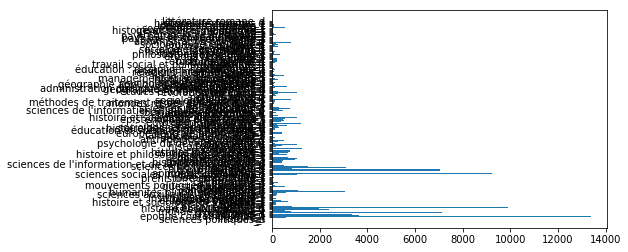

<Figure size 432x288 with 0 Axes>

In [32]:
# Histogramm: Blogs pro all_labels (besser in excel visualisieren)
height = list(all_labels_dic.values())
bars = list(all_labels_dic.keys())

y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

# Save as SVG:
plt.savefig(pictures+'/Blogs_all_labels_histogram.svg', format='svg')
plt.savefig(pictures+'/Blogs_all_labels_histogram.png')

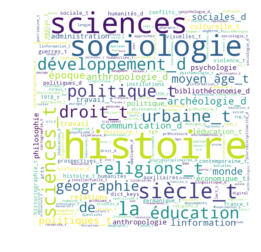

<Figure size 432x288 with 0 Axes>

In [33]:
# Visualisierung des all_label_dics in einer Wortwolke

# Create a list of word
textliste=str(all_labels_dic.keys())
textliste=textliste.replace(',', '').replace("'", "").replace('"', '').replace("l'", '').split(' ')
blacklist = ['et', 'du', 'études', 'de', 'des', 'la', 'dict_keys']
for element in textliste:
    if element in blacklist:
        textliste.remove(element)
text = str(textliste).replace("'", "")
    
# Create the wordcloud object
wordcloud = WordCloud(width=680, height=680, margin=0, background_color="white").generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
# Save as SVG:
plt.savefig(pictures+'/Blogs_per_all_labels_wordcloud.svg', format='svg')
plt.savefig(pictures+'/Blogs_per_all_labels_wordcloud.png', format='png')